(lecture04:plotting-simple-functions)=
# Plotting simple functions 

We plot using the [matplotlib](https://matplotlib.org/) Python library.
Again, this is a *huge* topic and we cannot cover everything here.
In general, 
if you know the type of plot that you want to do a simple Google search of the type "X matplotlib" will probably send you to an example that you can adjust to your needs.

Here is how to import `matplotlib`:

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

This code is sufficient to make all the figures in this notebook. But I want to make certain style choices that I will enforce throughout the jupyter notebook. For this, we are going to rely on the library [seaborn](https://seaborn.pydata.org/). Do not worry at this point about the details below.

In [2]:
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

I will be hiding this code block from now on, but you will still have to run it to get consistent style settings. Now, I am also going to need some helper functions to make it easier to save figures in a format that is suitable for publication.

In [3]:
MAKE_BOOK_FIGURES=False

import matplotlib as mpl

def set_book_style():
    plt.style.use('seaborn-v0_8-white') 
    sns.set_style("ticks")
    sns.set_palette("deep")

    mpl.rcParams.update({
        # Font settings
        'font.family': 'serif',  # For academic publishing
        'font.size': 8,  # As requested, 10pt font
        'axes.labelsize': 8,
        'axes.titlesize': 8,
        'xtick.labelsize': 7,  # Slightly smaller for better readability
        'ytick.labelsize': 7,
        'legend.fontsize': 7,
        
        # Line and marker settings for consistency
        'axes.linewidth': 0.5,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.0,
        'lines.markersize': 4,
        
        # Layout to prevent clipped labels
        'figure.constrained_layout.use': True,
        
        # Default DPI (will override when saving)
        'figure.dpi': 600,
        'savefig.dpi': 600,
        
        # Despine - remove top and right spines
        'axes.spines.top': False,
        'axes.spines.right': False,
        
        # Remove legend frame
        'legend.frameon': False,
        
        # Additional trim settings
        'figure.autolayout': True,  # Alternative to constrained_layout
        'savefig.bbox': 'tight',    # Trim when saving
        'savefig.pad_inches': 0.1   # Small padding to ensure nothing gets cut off
    })

def save_for_book(fig, filename, is_vector=True, **kwargs):
    """
    Save a figure with book-optimized settings.
    
    Parameters:
    -----------
    fig : matplotlib figure
        The figure to save
    filename : str
        Filename without extension
    is_vector : bool
        If True, saves as vector at 1000 dpi. If False, saves as raster at 600 dpi.
    **kwargs : dict
        Additional kwargs to pass to savefig
    """    
    # Set appropriate DPI and format based on figure type
    if is_vector:
        dpi = 1000
        ext = '.pdf'
    else:
        dpi = 600
        ext = '.tif'
    
    # Save the figure with book settings
    fig.savefig(f"{filename}{ext}", dpi=dpi, **kwargs)


def make_full_width_fig():
    return plt.subplots(figsize=(4.7, 2.9), constrained_layout=True)

def make_half_width_fig():
    return plt.subplots(figsize=(2.35, 1.45), constrained_layout=True)

if MAKE_BOOK_FIGURES:
    set_book_style()
make_full_width_fig = make_full_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()
make_half_width_fig = make_half_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()

Let's start by plotting simple 1D functions.
We are going to plot this function:

$$
f(t) = e^{-0.1t}\left[\cos(\pi t) + 0.5\sin(\pi t)\right],
$$

for $t$ between $0$ and $4\pi$.

We are going to need numpy as well:

In [4]:
import numpy as np

First you generate the data that you want to plot. Here is a dense set of $t$'s:

In [5]:
ts = np.linspace(0, 4 * np.pi, 100)
ts

array([ 0.        ,  0.12693304,  0.25386607,  0.38079911,  0.50773215,
        0.63466518,  0.76159822,  0.88853126,  1.01546429,  1.14239733,
        1.26933037,  1.3962634 ,  1.52319644,  1.65012947,  1.77706251,
        1.90399555,  2.03092858,  2.15786162,  2.28479466,  2.41172769,
        2.53866073,  2.66559377,  2.7925268 ,  2.91945984,  3.04639288,
        3.17332591,  3.30025895,  3.42719199,  3.55412502,  3.68105806,
        3.8079911 ,  3.93492413,  4.06185717,  4.1887902 ,  4.31572324,
        4.44265628,  4.56958931,  4.69652235,  4.82345539,  4.95038842,
        5.07732146,  5.2042545 ,  5.33118753,  5.45812057,  5.58505361,
        5.71198664,  5.83891968,  5.96585272,  6.09278575,  6.21971879,
        6.34665183,  6.47358486,  6.6005179 ,  6.72745093,  6.85438397,
        6.98131701,  7.10825004,  7.23518308,  7.36211612,  7.48904915,
        7.61598219,  7.74291523,  7.86984826,  7.9967813 ,  8.12371434,
        8.25064737,  8.37758041,  8.50451345,  8.63144648,  8.75

Now evalute the function values at each one of these points.

In [6]:
ys = np.exp(-0.1 * ts) * (np.cos(np.pi * ts) + 0.5 * np.cos(np.pi * ts))
ys

array([ 1.5       ,  1.36487265,  1.0214371 ,  0.5281828 , -0.03462964,
       -0.57796286, -1.01803271, -1.28917165, -1.3535599 , -1.20639331,
       -0.87580088, -0.41765634,  0.09378349,  0.57785694,  0.96016891,
        1.18397263,  1.21852887,  1.06322175,  0.74689914,  0.32265973,
       -0.14099063, -0.57115061, -0.90194072, -1.08454544, -1.09435684,
       -0.93418459, -0.63313281, -0.24142691,  0.17790604,  0.55913383,
        0.84408218,  0.99096827,  0.98047048,  0.8181622 ,  0.53302334,
        0.17235871, -0.20599842, -0.54292032, -0.78718816, -0.9032379 ,
       -0.87628396, -0.71409165, -0.44520748, -0.11401055,  0.22656758,
        0.52346717,  0.73173317,  0.82128475,  0.78120804,  0.62096845,
        0.3684317 ,  0.06508055, -0.24076064, -0.50159266, -0.67808799,
       -0.74498582, -0.69465739, -0.53784729, -0.30154639, -0.0243982 ,
        0.24958692,  0.47799243,  0.62653455,  0.67417595,  0.6160566 ,
        0.46384207,  0.24349996, -0.00908633, -0.2539317 , -0.45

And now we can plot. The simplet way to do it is this:

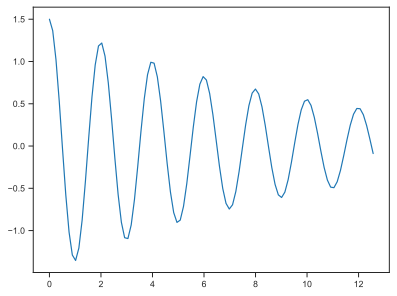

In [7]:
plt.plot(ts, ys);

Wait a minute! If you are paying attention you should have noticed that I added a ";" at the end of the line. Was this really necessary? What would happen if I did not do that?

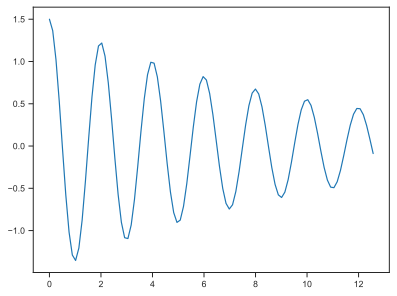

In [8]:
plt.plot(ts, ys)

It seems to work, but some text is also printed before the figure. Aha! This is because plot returns a list of the objects that have been plotted for future reference. But what does the ";" do. Well, all it does is it suppresses this output so that it is not printed. I will be using it from now on if I only want to see the figure and nothing else.

That was a simple way to plot the figure. But, I typically use the following more extensive version because it allows me to specify certain details like the size or the quality of the plot:

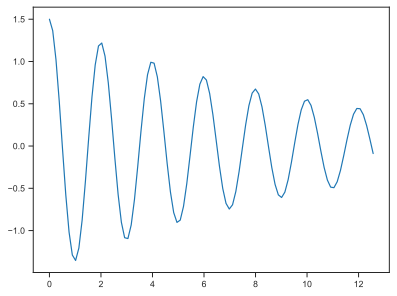

In [9]:
fig, ax = plt.subplots()
ax.plot(ts, ys);

Let's now add some more details in the plot.
Let's add x and y labels, and a title.

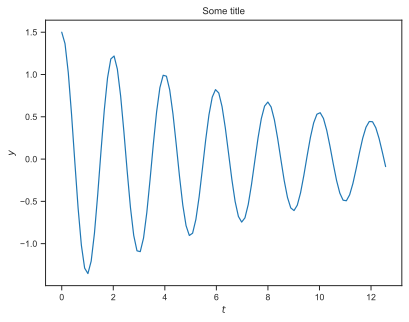

In [10]:
fig, ax = plt.subplots()
ax.plot(ts, ys)
ax.set_xlabel('$t$')
ax.set_ylabel('$y$')
ax.set_title('Some title');

You may have guessed it, but you just plotted the position of a harmonic oscillator with dumping! Think of the response of a spring-mass system with some dashpot taking out energy (e.g., the suspension system of car).

Let's now add one more function to the plot.
We are going to add the derivative of the position as a function of time, i.e., the velocity of the harmonic oscillator.
It is:

$$
\begin{array}{ccc}
v(t) &=& f'(t) = -0.1 e^{-0.1t}\left[\cos(\pi t) + 0.5\sin(\pi t)\right] + e^{-0.1t}\left[-\pi\sin(\pi t)+0.5\pi\sin(\pi t)\right]\\
&=&-0.1f(t) + e^{-0.1t}\left[-\pi\sin(\pi t)+0.5\pi\cos(\pi t)\right].
\end{array}
$$

Also, to make it easier to make figures that are in the correct size for the printed version of the book, I am going to use the following helper functions:

```python
def make_full_width_fig():
    return plt.subplots(figsize=(4.7, 2.9), constrained_layout=True)

def make_half_width_fig():
    return plt.subplots(figsize=(2.35, 1.45), constrained_layout=True)
```

The sizes are in inches. You do not have to use these in your own work though. You can replace all occurances of these with any other size you like or we just use the default size.

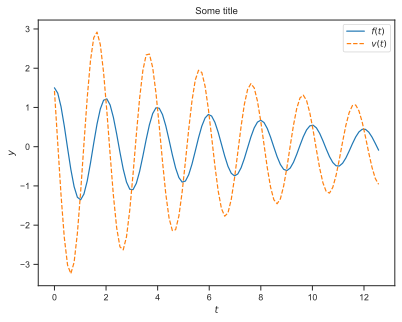

In [11]:
vs = -0.1 * ys + np.exp(-0.1 * ts) * (-np.pi * np.sin(np.pi * ts) + 0.5 * np.pi * np.cos(np.pi * ts))
fig, ax = make_full_width_fig()
ax.plot(ts, ys, label='$f(t)$')
ax.plot(ts, vs, '--', label='$v(t)$')
ax.set_xlabel('$t$')
ax.set_ylabel('$y$')
ax.set_title('Some title')
plt.legend(loc='best')
# This is how you save the figure for the book - you don't need it to
# display the figure in the notebook.
save_for_book(fig, 'ch4.fig1');

Notice that the colors are automatically different for the two curves.
However, you have to specify a different style.
You can also change the colors:

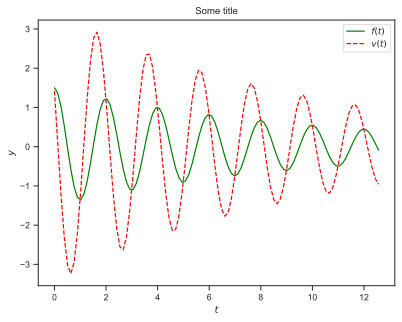

In [12]:
fig, ax = make_full_width_fig()
ax.plot(ts, ys, 'g', label='$f(t)$')
ax.plot(ts, vs, 'r--', label='$v(t)$')
ax.set_xlabel('$t$')
ax.set_ylabel('$y$')
ax.set_title('Some title')
plt.legend(loc='best');

You don't have to memorize the details of the style right now. A simple Google search can reveal the info you need and you will eventually start to remember the details.

Now, let's talk a bit about plotting style. According to [Tufte](https://www.edwardtufte.com/book/the-visual-display-of-quantitative-information/), the most important thing about a plot is the data-ink ratio - or in our case, the data-pixel ratio. The data-pixel ratio is the ratio of the area of the pixels used to display the data to the area of the pixels used to display the axes, labels, and titles. Tufte argues that the data-pixel ratio should be as high as possible. In other words, we should use as much of the space as possible to display the data. 

Let's try to apply the principles of Tufte to our plot.
What can we cut? Well, we don't really need the bounded box around the plot. This is gone. But we do need the horizontal and vertical axes. We will keep them. But we only need the ticks that correspond to data. So, we can draw the axes from the minimum to the maximum of the data for each axis. What else? Look at the legend. It is a box around it. This is not needed. Let's get rid of it. Here we go:


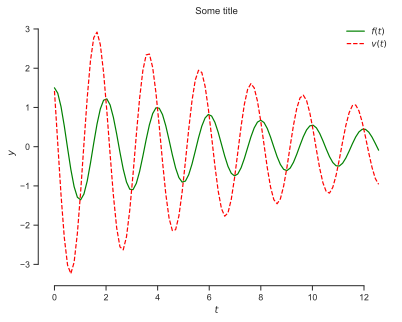

In [13]:
fig, ax = make_full_width_fig()
ax.plot(ts, ys, 'g', label='$f(t)$')
ax.plot(ts, vs, 'r--', label='$v(t)$')
ax.set_xlabel('$t$')
ax.set_ylabel('$y$')
ax.set_title('Some title')
sns.despine(trim=True)
plt.legend(loc='best', frameon=False);

We are not going to bother to despine every single plot though. Too much work.

Let's plot the same data on the so-called **phase space** (position vs velocity).

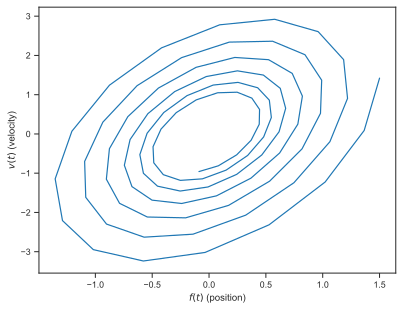

In [14]:
fig, ax = make_full_width_fig()
ax.plot(ys, vs)
ax.set_xlabel('$f(t)$ (position)')
ax.set_ylabel('$v(t)$ (velocity)')
save_for_book(fig, 'ch4.fig2');

We get a nice spiral centered around $(0, 0)$.
For the dumped harmonic oscilator, $(0, 0)$ is the steady state solution.
This is were the physical system goes after a lot of time.

(lecture04:saving-plots)=
## Saving figures to files

You now know how to make figures.
You can see them in the jupyter notebooks you are running.
But what if you want to extract them so that you can put them in a paper or your presentation.
You can take a screenshot of them, but that's kind of ridiculous, isn't it?
Here is how you can save a figure to pretty much any format you like:

In [15]:
fig.savefig('pendulum.png')

This is saved in your current working directory.
Here it is:

In [16]:
!ls -lh pendulum.png

-rw-r--r--@ 1 boltm  staff    63K Sep 15 09:56 pendulum.png


And you can make save your figure in multiple formats:

In [17]:
fig.savefig('pendulum.jpg')
fig.savefig('pendulum.pdf')
fig.savefig('pendulum.svg')
!ls -lh pendulum.*

-rw-r--r--@ 1 boltm  staff    33K Sep 15 09:56 pendulum.jpg
-rw-r--r--@ 1 boltm  staff    16K Sep 15 09:56 pendulum.pdf
-rw-r--r--@ 1 boltm  staff    63K Sep 15 09:56 pendulum.png
-rw-r--r--@ 1 boltm  staff    23K Sep 15 09:56 pendulum.svg


For more options see the documentation of [`savefig()`](http://jupyterbook.org).

## Questions

+ Rerun the code blocks above, but use a higher data collection frequency. We used 100 timesteps between times 0 and $4\pi$. Double and quadruple that number to make the plotted curves look smoother.
+ Rerun the code blocks above for a much longer time so that your spiral really starts touching $(0, 0)$.

In [ ]:
# YOUR CODE HERE